In [1]:
## Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import csv

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import tensorflow as tf
import xgboost as xgb

from unidecode import unidecode
from nameparser import HumanName
from pybaseball import *
from lxml import html

In [2]:
#loading dataset
path = 'C:/Users/kenne/mvp_analysis/'
try:
    start_year = str(int(input('Enter start year:')))
    end_year = str(int(input('Enter end year:')))
except ValueError:
    print("Invalid input. Please enter a valid integer.")

Enter start year: 2007
Enter end year: 2023


In [3]:
file_path = path + 'mvp_voting_' + start_year + "_" + end_year + "_merged_data.csv"
df = pd.read_csv(file_path)
df.head()

,Rank,LgYear,Year,Name_x,Share,WAR_x,G_x,AB_x,R_x,H_x,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,1,AL07,NaN,Alex Rodriguez,1.000000,1.000000,0.914894,0.597458,1.0000,0.45,...,NaN,NaN,NaN,NaN,0.597403,0.711864,NaN,NaN,NaN,1.000000
1,2,AL07,NaN,Magglio Ordóñez,0.680412,0.708333,0.893617,0.648305,0.6750,0.78,...,NaN,NaN,NaN,NaN,0.454545,0.347458,NaN,NaN,NaN,0.794872
2,3,AL07,NaN,Vladimir Guerrero,0.536082,0.333333,0.744681,0.559322,0.3250,0.48,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.179487
3,4,AL07,NaN,David Ortiz,0.463918,0.583333,0.723404,0.453390,0.6625,0.44,...,NaN,NaN,NaN,NaN,0.467532,0.406780,NaN,NaN,NaN,0.576923
4,5,AL07,NaN,Mike Lowell,0.329897,0.388889,0.829787,0.622881,0.2000,0.53,...,NaN,NaN,NaN,NaN,0.915584,0.644068,NaN,NaN,NaN,0.346154


In [4]:
#df_filtered = df.drop(columns = ['G_y','AB_y','PA','H_y','HR_y','R_y','RBI_y','BB_y','SB_y','OBP_y','SLG_y','OPS_y','WAR_y'
#                                ,'Rank','Year','Name_x','Name_y','Team','Age','Dol', 'Age Rng'])
df_filtered = df.drop(columns = ["LgYear","Year","Name_x","Name_y","Team",'Age','Dol', 'Age Rng', 'Rank','IDfg']) #filter out irrelevant and non-integer features

df = df_filtered
df.head()

,Share,WAR_x,G_x,AB_x,R_x,H_x,HR_x,RBI_x,SB_x,BB_x,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,1.000000,1.000000,0.914894,0.597458,1.0000,0.45,1.000000,1.000000,0.585366,0.783784,...,NaN,NaN,NaN,NaN,0.597403,0.711864,NaN,NaN,NaN,1.000000
1,0.680412,0.708333,0.893617,0.648305,0.6750,0.78,0.490196,0.826531,0.097561,0.527027,...,NaN,NaN,NaN,NaN,0.454545,0.347458,NaN,NaN,NaN,0.794872
2,0.536082,0.333333,0.744681,0.559322,0.3250,0.48,0.470588,0.683673,0.048780,0.459459,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.179487
3,0.463918,0.583333,0.723404,0.453390,0.6625,0.44,0.627451,0.602041,0.073171,1.000000,...,NaN,NaN,NaN,NaN,0.467532,0.406780,NaN,NaN,NaN,0.576923
4,0.329897,0.388889,0.829787,0.622881,0.2000,0.53,0.352941,0.632653,0.073171,0.216216,...,NaN,NaN,NaN,NaN,0.915584,0.644068,NaN,NaN,NaN,0.346154


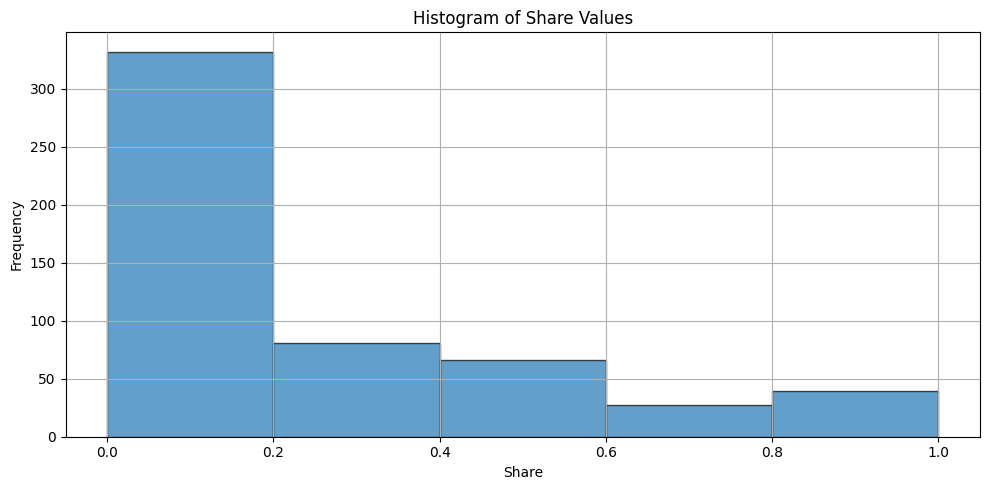

In [5]:
# Extract Share values from the DataFrame
share_values = df['Share'].values

# Plot histogram of Share values
plt.figure(figsize=(10, 5))
plt.hist(share_values, bins=5, edgecolor='black', alpha=0.7)
plt.xlabel('Share')
plt.ylabel('Frequency')
plt.title('Histogram of Share Values')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
def remove_suffix(df):
    # Iterate over columns
    for col in df.columns:
        # Check if the column name ends with '_x'
        if col.endswith('_x'):
            # Remove the '_x' suffix
            base_col = col[:-2]
            # Check if there is a corresponding column with '_y' suffix
            if f'{base_col}_y' in df.columns:
                # Rename the column without '_x'
                df.rename(columns={col: base_col}, inplace=True)
    
    return df

# Clean the DataFrame
df_cleaned = remove_suffix(df)

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned)
df_cleaned.to_csv("2024A.csv")

Cleaned DataFrame:
        Share       WAR         G        AB         R         H        HR  \
0    1.000000  1.000000  0.914894  0.597458  1.000000  0.450000  1.000000   
1    0.680412  0.708333  0.893617  0.648305  0.675000  0.780000  0.490196   
2    0.536082  0.333333  0.744681  0.559322  0.325000  0.480000  0.470588   
3    0.463918  0.583333  0.723404  0.453390  0.662500  0.440000  0.627451   
4    0.329897  0.388889  0.829787  0.622881  0.200000  0.530000  0.352941   
..        ...       ...       ...       ...       ...       ...       ...   
540  0.000000  0.350649  0.500000  0.392473  0.166667  0.294118  0.681818   
541  0.000000  0.000000  0.944444  0.688172  0.474359  0.000000  0.840909   
542  0.000000  0.545455  0.583333  0.580645  0.128205  0.225490  0.272727   
543  0.000000  0.116883  0.861111  0.908602  0.102564  0.539216  0.431818   
544  0.000000  0.415584  0.861111  0.672043  0.192308  0.343137  0.522727   

          RBI        SB        BB  ...     maxEV   HardH

In [7]:
def remove_columns_with_suffix(df, suffix='_y'):
    # Identify columns to drop
    columns_to_drop = [col for col in df.columns if col.endswith(suffix)]
    
    # Drop identified columns
    df.drop(columns=columns_to_drop, inplace=True)
    
    return df

df_cleaned = remove_columns_with_suffix(df_cleaned)
print(df_cleaned)

        Share       WAR         G        AB         R         H        HR  \
0    1.000000  1.000000  0.914894  0.597458  1.000000  0.450000  1.000000   
1    0.680412  0.708333  0.893617  0.648305  0.675000  0.780000  0.490196   
2    0.536082  0.333333  0.744681  0.559322  0.325000  0.480000  0.470588   
3    0.463918  0.583333  0.723404  0.453390  0.662500  0.440000  0.627451   
4    0.329897  0.388889  0.829787  0.622881  0.200000  0.530000  0.352941   
..        ...       ...       ...       ...       ...       ...       ...   
540  0.000000  0.350649  0.500000  0.392473  0.166667  0.294118  0.681818   
541  0.000000  0.000000  0.944444  0.688172  0.474359  0.000000  0.840909   
542  0.000000  0.545455  0.583333  0.580645  0.128205  0.225490  0.272727   
543  0.000000  0.116883  0.861111  0.908602  0.102564  0.539216  0.431818   
544  0.000000  0.415584  0.861111  0.672043  0.192308  0.343137  0.522727   

          RBI        SB        BB  ...     maxEV   HardHit  HardHit%  \
0  

In [8]:
Y = df['Share']
X = df.drop(['Share'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

feature_names = [f"Feature {i}: {col}" for i, col in enumerate(X.columns, start=0)]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [9]:
predY = forest.predict(X_test)
predictions = pd.DataFrame({'Actual': Y_test, 'Predicted': predY})
predictions

,Actual,Predicted
316,0.010000,0.084309
77,0.340659,0.233465
360,0.574468,0.344371
90,0.728261,0.886204
493,0.000000,0.020598
...,...,...
15,0.010309,0.115670
357,1.000000,0.446170
39,0.444444,0.340546
54,0.010101,0.133311


In [10]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, predY)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, predY)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(Y_test, predY, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-squared (Coefficient of Determination)
r2 = r2_score(Y_test, predY)
print(f"R-squared (R2 Score): {r2:.4f}")

Mean Absolute Error (MAE): 0.1244
Mean Squared Error (MSE): 0.0287
Root Mean Squared Error (RMSE): 0.1695
R-squared (R2 Score): 0.6564


C:\Users\kenne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.016 seconds


C:\Users\kenne\AppData\Local\Temp\ipykernel_2732\3715363695.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, forest_importances[i] + 0.005, f'{std_val:.3f}', ha='center', va='bottom')


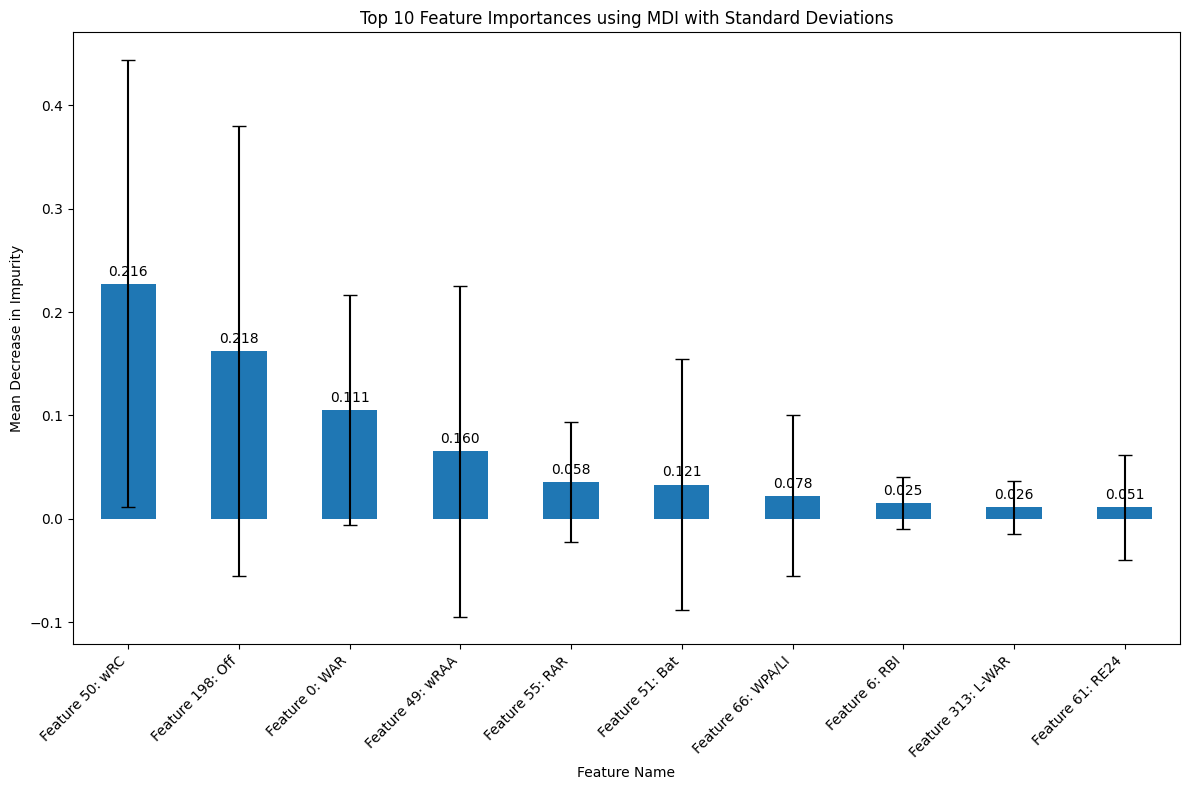

In [12]:
# Variable to specify the number of top features to display
top_n = 10

# Create a pandas Series for feature importances
forest_importances = pd.Series(importances, index=feature_names)
# Sort feature importances and select top `top_n`
forest_importances = forest_importances.sort_values(ascending=False).head(top_n)

# Get std for top features based on their sorted order
std_topn = std[np.argsort(importances)[::-1][:top_n]]

# Plotting feature importances with std deviations
fig, ax = plt.subplots(figsize=(12, 8))

forest_importances.plot.bar(yerr=std_topn, ax=ax, capsize = 5)
ax.set_title(f"Top {top_n} Feature Importances using MDI with Standard Deviations")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xlabel("Feature Name")

# Add numeric values for std on each bar
for i, std_val in enumerate(std_topn):
    ax.text(i, forest_importances[i] + 0.005, f'{std_val:.3f}', ha='center', va='bottom')
    
# Add feature labels
ax.set_xticklabels(forest_importances.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [13]:
# List to store attribute features
attribute_impurity_features = []

# Extract attribute feature from each feature name
for feature_name in forest_importances.keys():
    attribute_feature = feature_name.split(': ')[1]  # Split and get the second part
    attribute_impurity_features.append(attribute_feature)

# Print the resulting list of attribute features
print(attribute_impurity_features)

['wRC', 'Off', 'WAR', 'wRAA', 'RAR', 'Bat', 'WPA/LI', 'RBI', 'L-WAR', 'RE24']


In [14]:
start_time = time.time()
result = permutation_importance(
    forest, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 16.223 seconds


C:\Users\kenne\AppData\Local\Temp\ipykernel_2732\59403104.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, forest_importances[i] + 0.005, f'{std_val:.3f}', ha='center', va='bottom')


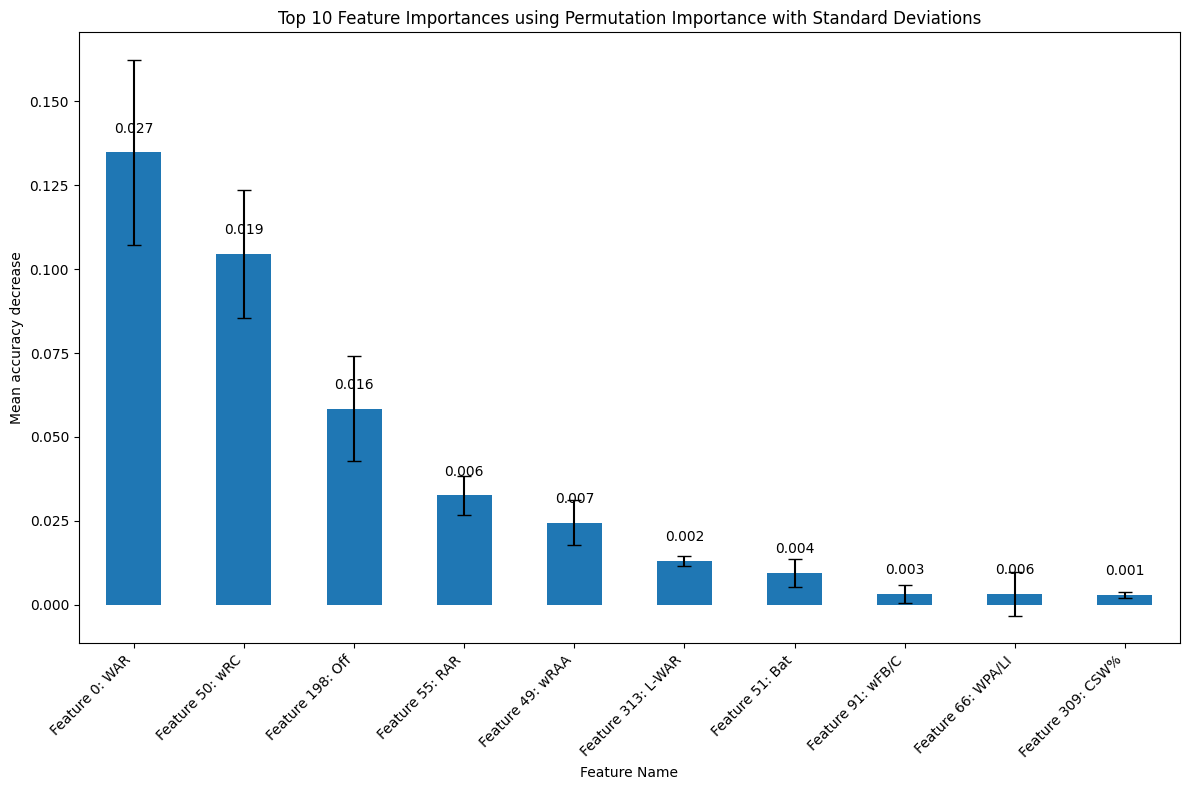

In [15]:
# Extract permutation importances and their std deviations
importances_mean = result.importances_mean
importances_std = result.importances_std

# Create a pandas Series for feature importances
forest_importances = pd.Series(importances_mean, index=feature_names)

# Set the number of top features you want to show (replace with your desired value)
n = 10

# Sort feature importances and select top n
forest_importances = forest_importances.sort_values(ascending=False).head(n)

# Get std for top features based on their sorted order
std_topn = importances_std[np.argsort(importances_mean)[::-1][:n]]

# Plotting feature importances with std deviations
fig, ax = plt.subplots(figsize=(12, 8))

forest_importances.plot.bar(yerr=std_topn, ax=ax, capsize = 5)
ax.set_title(f"Top {n} Feature Importances using Permutation Importance with Standard Deviations")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("Feature Name")

# Add numeric values for std on each bar
for i, std_val in enumerate(std_topn):
    ax.text(i, forest_importances[i] + 0.005, f'{std_val:.3f}', ha='center', va='bottom')

ax.set_xticklabels(forest_importances.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# List to store attribute features
attribute_permutated_features = []

# Extract attribute feature from each feature name
for feature_name in forest_importances.keys():
    attribute_feature = feature_name.split(': ')[1]  # Split and get the second part
    attribute_permutated_features.append(attribute_feature)

# Print the resulting list of attribute features
print(attribute_permutated_features)

['WAR', 'wRC', 'Off', 'RAR', 'wRAA', 'L-WAR', 'Bat', 'wFB/C', 'WPA/LI', 'CSW%']


In [17]:
attributes = attribute_impurity_features + attribute_permutated_features
print(attributes)

['wRC', 'Off', 'WAR', 'wRAA', 'RAR', 'Bat', 'WPA/LI', 'RBI', 'L-WAR', 'RE24', 'WAR', 'wRC', 'Off', 'RAR', 'wRAA', 'L-WAR', 'Bat', 'wFB/C', 'WPA/LI', 'CSW%']


In [18]:
attributes = list(dict.fromkeys(attributes))
print(attributes)

['wRC', 'Off', 'WAR', 'wRAA', 'RAR', 'Bat', 'WPA/LI', 'RBI', 'L-WAR', 'RE24', 'wFB/C', 'CSW%']


In [19]:
test_df = df

In [20]:
test_df.head()

,Share,WAR,G,AB,R,H,HR,RBI,SB,BB,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,1.000000,1.000000,0.914894,0.597458,1.0000,0.45,1.000000,1.000000,0.585366,0.783784,...,NaN,NaN,NaN,NaN,0.597403,0.711864,NaN,NaN,NaN,1.000000
1,0.680412,0.708333,0.893617,0.648305,0.6750,0.78,0.490196,0.826531,0.097561,0.527027,...,NaN,NaN,NaN,NaN,0.454545,0.347458,NaN,NaN,NaN,0.794872
2,0.536082,0.333333,0.744681,0.559322,0.3250,0.48,0.470588,0.683673,0.048780,0.459459,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.179487
3,0.463918,0.583333,0.723404,0.453390,0.6625,0.44,0.627451,0.602041,0.073171,1.000000,...,NaN,NaN,NaN,NaN,0.467532,0.406780,NaN,NaN,NaN,0.576923
4,0.329897,0.388889,0.829787,0.622881,0.2000,0.53,0.352941,0.632653,0.073171,0.216216,...,NaN,NaN,NaN,NaN,0.915584,0.644068,NaN,NaN,NaN,0.346154


In [21]:
#test_df = test_df[['Share', 'WAR_x','L-WAR','wRC','Off','HR_x','RBI_x','H_x','wOBA','RAR', 'Contact% (pi)']]
#df = df[['Share', 'WAR_x','L-WAR','REW','Off','HR_x','RBI_x','H_x','wOBA','RAR', 'Contact% (pi)']]

attributes.append('Share')
attributes = list(dict.fromkeys(attributes))
print(attributes)
test_df = test_df[attributes] # test_df is df with top n attributes
test_df.dropna(axis=1, how='any', inplace=True)

['wRC', 'Off', 'WAR', 'wRAA', 'RAR', 'Bat', 'WPA/LI', 'RBI', 'L-WAR', 'RE24', 'wFB/C', 'CSW%', 'Share']


C:\Users\kenne\AppData\Local\Temp\ipykernel_2732\1554727667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.dropna(axis=1, how='any', inplace=True)


In [22]:
Y = test_df['Share']
X = test_df.drop(['Share'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

feature_names = [f"Feature {i}: {col}" for i, col in enumerate(X.columns, start=0)]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [23]:
predY = forest.predict(X_test)
predictions = pd.DataFrame({'Actual': Y_test, 'Predicted': predY})
predictions

,Actual,Predicted
316,0.010000,0.042228
77,0.340659,0.125222
360,0.574468,0.452133
90,0.728261,0.844989
493,0.000000,0.032014
...,...,...
15,0.010309,0.079536
357,1.000000,0.445995
39,0.444444,0.306606
54,0.010101,0.094025


In [24]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, predY)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, predY)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(Y_test, predY, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-squared (Coefficient of Determination)
r2 = r2_score(Y_test, predY)
print(f"R-squared (R2 Score): {r2:.4f}")

Mean Absolute Error (MAE): 0.1218
Mean Squared Error (MSE): 0.0295
Root Mean Squared Error (RMSE): 0.1717
R-squared (R2 Score): 0.6475


C:\Users\kenne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Metrics for Share bin [0.0-0.2):
  MAE: 0.0707
  MSE: 0.0086
  RMSE: 0.0926
  R2 Score: -2.5944
Metrics for Share bin [0.2-0.4):
  MAE: 0.1376
  MSE: 0.0256
  RMSE: 0.1599
  R2 Score: -8.5899
Metrics for Share bin [0.4-0.6):
  MAE: 0.2153
  MSE: 0.0647
  RMSE: 0.2543
  R2 Score: -15.6112
Metrics for Share bin [0.6-0.8):
  MAE: 0.2763
  MSE: 0.0982
  RMSE: 0.3134
  R2 Score: -32.5618
Metrics for Share bin [0.8-1.0):
  MAE: 0.0391
  MSE: 0.0026
  RMSE: 0.0506
  R2 Score: -4.9313


C:\Users\kenne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kenne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kenne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kenne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

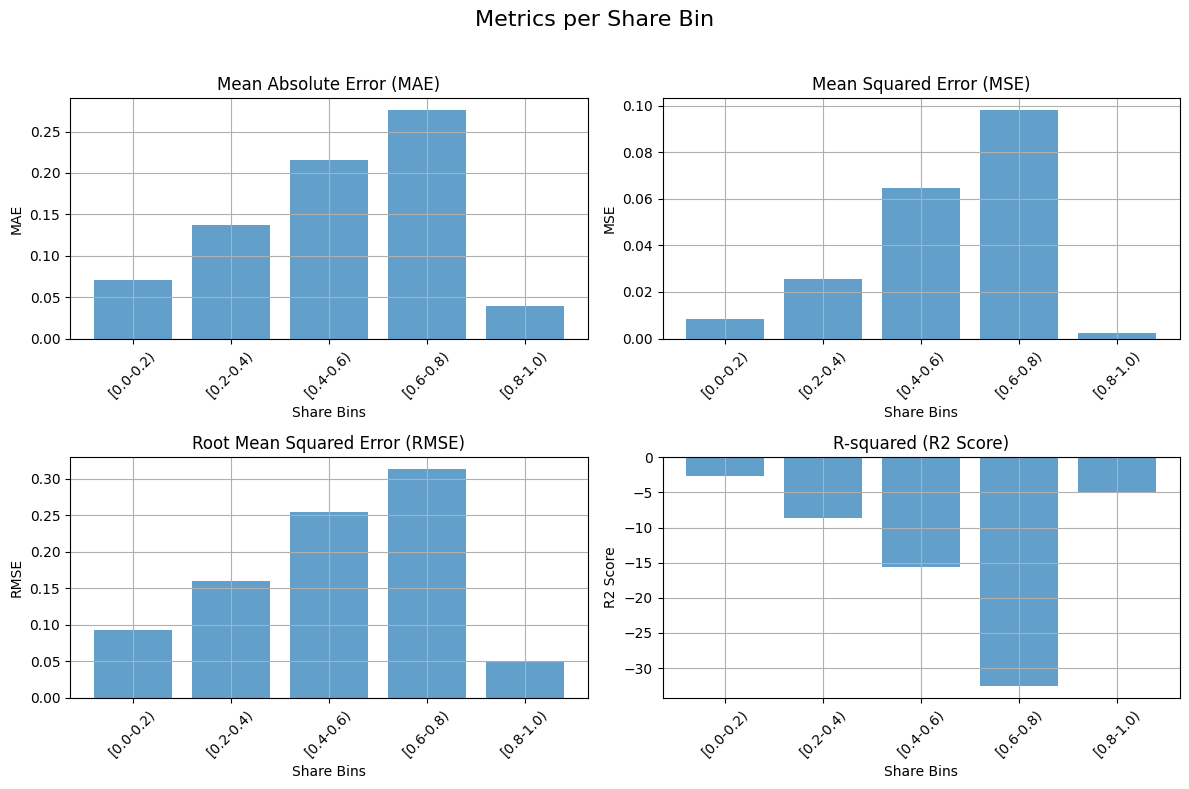

In [25]:
def plot_metrics_per_share_bin(Y_test, predY, bin_edges):
    # Assign predictions and actuals to bins
    bins_predicted = np.digitize(predY, bins=bin_edges) - 1  # -1 to match 0-based indexing
    bins_actual = np.digitize(Y_test, bins=bin_edges) - 1     # -1 to match 0-based indexing

    # Initialize lists to store metrics for each bin
    mae_per_bin = []
    mse_per_bin = []
    rmse_per_bin = []
    r2_per_bin = []

    # Calculate metrics for each bin
    for i in range(len(bin_edges) - 1):
        indices = np.where(bins_actual == i)[0]  # Get indices of actuals in bin i
        if len(indices) > 0:
            mae_bin = mean_absolute_error(Y_test.iloc[indices], predY[indices])
            mse_bin = mean_squared_error(Y_test.iloc[indices], predY[indices])
            rmse_bin = mean_squared_error(Y_test.iloc[indices], predY[indices], squared=False)
            r2_bin = r2_score(Y_test.iloc[indices], predY[indices])
            mae_per_bin.append(mae_bin)
            mse_per_bin.append(mse_bin)
            rmse_per_bin.append(rmse_bin)
            r2_per_bin.append(r2_bin)
        else:
            mae_per_bin.append(0.0)
            mse_per_bin.append(0.0)
            rmse_per_bin.append(0.0)
            r2_per_bin.append(0.0)

    # Print metrics for each bin
    for i, (start, end) in enumerate(zip(bin_edges[:-1], bin_edges[1:])):
        print(f"Metrics for Share bin [{start}-{end}):")
        print(f"  MAE: {mae_per_bin[i]:.4f}")
        print(f"  MSE: {mse_per_bin[i]:.4f}")
        print(f"  RMSE: {rmse_per_bin[i]:.4f}")
        print(f"  R2 Score: {r2_per_bin[i]:.4f}")

    # Plot metrics per share bin
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Metrics per Share Bin', fontsize=16)

    axs[0, 0].bar(range(len(bin_edges) - 1), mae_per_bin, align='center', alpha=0.7)
    axs[0, 0].set_title('Mean Absolute Error (MAE)')
    axs[0, 0].set_xlabel('Share Bins')
    axs[0, 0].set_ylabel('MAE')
    axs[0, 0].grid(True)
    axs[0, 0].set_xticks(range(len(bin_edges) - 1))
    axs[0, 0].set_xticklabels([f"[{bin_edges[i]}-{bin_edges[i+1]})" for i in range(len(bin_edges) - 1)], rotation=45)

    axs[0, 1].bar(range(len(bin_edges) - 1), mse_per_bin, align='center', alpha=0.7)
    axs[0, 1].set_title('Mean Squared Error (MSE)')
    axs[0, 1].set_xlabel('Share Bins')
    axs[0, 1].set_ylabel('MSE')
    axs[0, 1].grid(True)
    axs[0, 1].set_xticks(range(len(bin_edges) - 1))
    axs[0, 1].set_xticklabels([f"[{bin_edges[i]}-{bin_edges[i+1]})" for i in range(len(bin_edges) - 1)], rotation=45)

    axs[1, 0].bar(range(len(bin_edges) - 1), rmse_per_bin, align='center', alpha=0.7)
    axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
    axs[1, 0].set_xlabel('Share Bins')
    axs[1, 0].set_ylabel('RMSE')
    axs[1, 0].grid(True)
    axs[1, 0].set_xticks(range(len(bin_edges) - 1))
    axs[1, 0].set_xticklabels([f"[{bin_edges[i]}-{bin_edges[i+1]})" for i in range(len(bin_edges) - 1)], rotation=45)

    axs[1, 1].bar(range(len(bin_edges) - 1), r2_per_bin, align='center', alpha=0.7)
    axs[1, 1].set_title('R-squared (R2 Score)')
    axs[1, 1].set_xlabel('Share Bins')
    axs[1, 1].set_ylabel('R2 Score')
    axs[1, 1].grid(True)
    axs[1, 1].set_xticks(range(len(bin_edges) - 1))
    axs[1, 1].set_xticklabels([f"[{bin_edges[i]}-{bin_edges[i+1]})" for i in range(len(bin_edges) - 1)], rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage
bin_edges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plot_metrics_per_share_bin(Y_test, predY, bin_edges)

In [26]:
file_path = path + 'NL_prospects.csv'
nl_df = pd.read_csv(file_path)
nl_df.head()

,Unnamed: 0,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last,IDfg,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,0,ohtani,shohei,0.862046,ohtas001,ohtansh01,0.675553,0.615385,0.0,19755,...,1.000000,1.000000,1.000000,0.488,0.386792,0.476636,1.000000,1.000000,1.000,1.000000
1,1,harper,bryce,0.173458,harpb003,harpebr03,0.291829,0.153846,0.0,11579,...,0.379630,0.333333,0.649616,0.168,0.000000,0.308411,0.390909,0.368821,0.352,0.633333
2,2,ozuna,marcell,0.143763,ozunm001,ozunama01,0.232928,0.230769,0.0,10324,...,0.574074,0.626667,0.846547,0.280,0.245283,0.551402,0.763636,0.980989,0.872,0.733333
3,3,freeman,freddie,0.000000,freef001,freemfr01,0.000000,0.000000,0.0,5361,...,0.361111,0.306667,0.432225,0.456,0.150943,0.000000,0.454545,0.304183,0.408,0.700000
4,4,tatís,fernando,0.893805,tatif002,tatisfe02,0.673394,0.692308,0.0,19709,...,0.777778,0.746667,0.785166,0.488,0.235849,0.373832,0.627273,0.528517,0.496,0.566667


In [27]:
file_path = path + 'AL_prospects.csv'
al_df = pd.read_csv(file_path)
al_df.head()

,Unnamed: 0,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last,IDfg,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,0,judge,aaron,0.461341,judga001,judgeaa01,0.422892,0.416667,0.0,15640,...,0.929293,0.871795,1.000000,0.456140,0.500000,0.663717,0.766990,1.000000,1.000000,1.00
1,1,soto,juan,0.897284,sotoj001,sotoju01,0.608340,0.583333,0.0,20123,...,0.888889,1.000000,0.892638,0.701754,0.925926,0.610619,0.902913,0.774278,0.938547,0.94
2,2,henderson,gunnar,0.999946,hendg002,hendegu01,0.863407,0.916667,0.0,26289,...,0.626263,0.846154,0.815951,0.596491,0.574074,0.548673,0.524272,0.482940,0.525140,0.92
3,3,witt,bobby,0.969903,wittb002,wittbo02,0.841689,0.916667,0.0,25764,...,0.646465,0.923077,0.570552,1.000000,0.490741,0.442478,1.000000,0.674541,0.681564,0.86
4,4,ramírez,josé,0.554249,ramij003,ramirjo01,0.334781,0.166667,0.0,13510,...,0.212121,0.564103,0.276074,0.903509,0.407407,0.070796,0.155340,0.188976,0.094972,0.46


In [28]:
attributes.remove('Share')

In [29]:
nl_df_test = nl_df[attributes]
nl_df_test.head()

,wRC,Off,WAR,wRAA,RAR,Bat,WPA/LI,RBI,L-WAR,RE24,wFB/C,CSW%
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.688889,1.000000,0.821209,1.000000,0.476636
1,0.631579,0.543478,0.733333,0.607509,0.731293,0.586885,0.327586,0.622222,0.633333,0.518259,0.607539,0.308411
2,0.868421,0.739130,0.700000,0.921502,0.683673,0.881967,0.798851,1.000000,0.733333,1.000000,0.815965,0.551402
3,0.789474,0.618012,0.700000,0.699659,0.687075,0.714754,0.517241,0.555556,0.700000,0.435291,0.416851,0.000000
4,0.552632,0.397516,0.566667,0.392491,0.554422,0.452459,0.298851,0.377778,0.566667,0.330120,0.545455,0.373832


In [30]:
# Predict on the new data
predictions = forest.predict(nl_df_test)

# Print or use predictions as needed
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[0.94721483 0.3008512  0.50901509 0.42589373 0.16474307 0.37106754
 0.24652397 0.03601737 0.53531498 0.22214131 0.22838968 0.1487219
 0.0490919  0.02986555 0.02526395 0.03723741 0.22897522 0.14275858]


In [31]:
predictions_NL = pd.DataFrame({
    'Last Name': nl_df['name_last'], 
    'First Name': nl_df['name_first'], 
    'Predicted Share (Random Forest)': predictions
})

In [32]:
predictions_NL['Date_Run'] = pd.Timestamp.now().strftime('%Y-%m-%d')

In [33]:
predictions_NL = pd.concat([predictions_NL, nl_df_test], axis=1)

In [34]:
predictions_NL.shape

(18, 16)

In [35]:
print(predictions_NL)

     Last Name First Name  Predicted Share (Random Forest)    Date_Run  \
0       ohtani     shohei                         0.947215  2024-06-19   
1       harper      bryce                         0.300851  2024-06-19   
2        ozuna    marcell                         0.509015  2024-06-19   
3      freeman    freddie                         0.425894  2024-06-19   
4        tatís   fernando                         0.164743  2024-06-19   
5        marte      ketel                         0.371068  2024-06-19   
6    contreras    william                         0.246524  2024-06-19   
7        olson       matt                         0.036017  2024-06-19   
8        betts     mookie                         0.535315  2024-06-19   
9         bohm       alec                         0.222141  2024-06-19   
10      lindor  francisco                         0.228390  2024-06-19   
11  de la cruz       elly                         0.148722  2024-06-19   
12      abrams         cj             

In [36]:
al_df_test = al_df[attributes]
al_df_test.head()
al_df_test.shape

(18, 12)

In [37]:
# Predict on the new data
predictions = forest.predict(al_df_test)

# Print or use predictions as needed
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[0.99181793 0.60743238 0.26569972 0.32377039 0.19979099 0.26021315
 0.05438656 0.11539308 0.07704943 0.05328306 0.09421149 0.06517976
 0.12894667 0.06164588 0.03943779 0.00265761 0.04164231 0.09594798]


In [38]:
predictions_AL = pd.DataFrame({
    'Last Name': al_df['name_last'], 
    'First Name': al_df['name_first'], 
    'Predicted Share (Random Forest)': predictions
})

In [39]:
predictions_AL['Date_Run'] = pd.Timestamp.now().strftime('%Y-%m-%d')

In [40]:
predictions_AL = pd.concat([predictions_AL, al_df_test], axis=1)

In [41]:
print(predictions_AL)

    Last Name First Name  Predicted Share (Random Forest)    Date_Run  \
0       judge      aaron                         0.991818  2024-06-19   
1        soto       juan                         0.607432  2024-06-19   
2   henderson     gunnar                         0.265700  2024-06-19   
3        witt      bobby                         0.323770  2024-06-19   
4     ramírez       josé                         0.199791  2024-06-19   
5      tucker       kyle                         0.260213  2024-06-19   
6      seager      corey                         0.054387  2024-06-19   
7   rutschman      adley                         0.115393  2024-06-19   
8     álvarez     yordan                         0.077049  2024-06-19   
9      devers     rafael                         0.053283  2024-06-19   
10     altuve       josé                         0.094211  2024-06-19   
11     semien     marcus                         0.065180  2024-06-19   
12      pérez   salvador                         0.

In [42]:
test_df.tail()

,wRC,Off,WAR,wRAA,RAR,Bat,WPA/LI,RBI,L-WAR,RE24,wFB/C,CSW%,Share
540,0.293333,0.322108,0.350649,0.433754,0.271375,0.421569,0.603030,0.442857,0.310811,0.364611,0.783019,0.582609,0.0
541,0.346667,0.118594,0.000000,0.247634,0.000000,0.233660,0.242424,0.500000,0.054054,0.294906,0.240566,1.000000,0.0
542,0.000000,0.010249,0.545455,0.000000,0.472119,0.000000,0.000000,0.157143,0.527027,0.000000,0.160377,0.660870,0.0
543,0.133333,0.000000,0.116883,0.089905,0.035936,0.073529,0.168182,0.528571,0.000000,0.112198,0.056604,0.886957,0.0
544,0.226667,0.193265,0.415584,0.230284,0.372986,0.223856,0.250000,0.485714,0.378378,0.141421,0.424528,0.513043,0.0


In [43]:
df.dropna(axis=1, how='any', inplace=True)

In [44]:
tf.random.set_seed(42)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0920 - mae: 0.2438 - val_loss: 0.0522 - val_mae: 0.1710
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0456 - mae: 0.1738 - val_loss: 0.0590 - val_mae: 0.1765
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0550 - mae: 0.1921 - val_loss: 0.0688 - val_mae: 0.1933
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0645 - mae: 0.2072 - val_loss: 0.0392 - val_mae: 0.1461
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - mae: 0.1405 - val_loss: 0.0410 - val_mae: 0.1487
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0263 - mae: 0.1257 - val_loss: 0.0390 - val_mae: 0.1388
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0305 - mae: 0.1378 - val_loss: 0.0362 - val_mae: 0.1281
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0295 - mae: 0.1320 - val_loss: 0.0355 - val_mae: 0.1357
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0

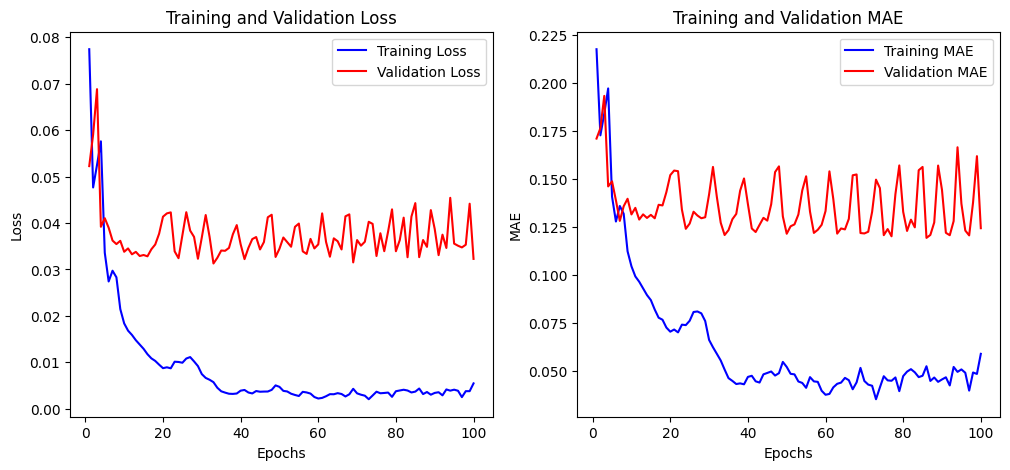

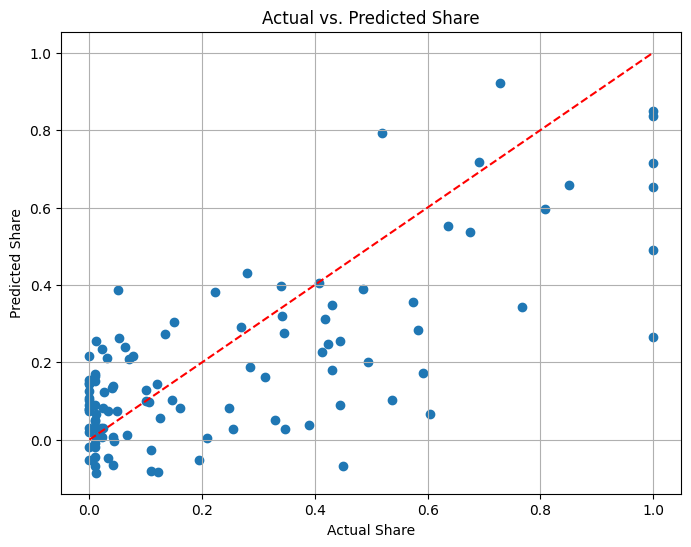

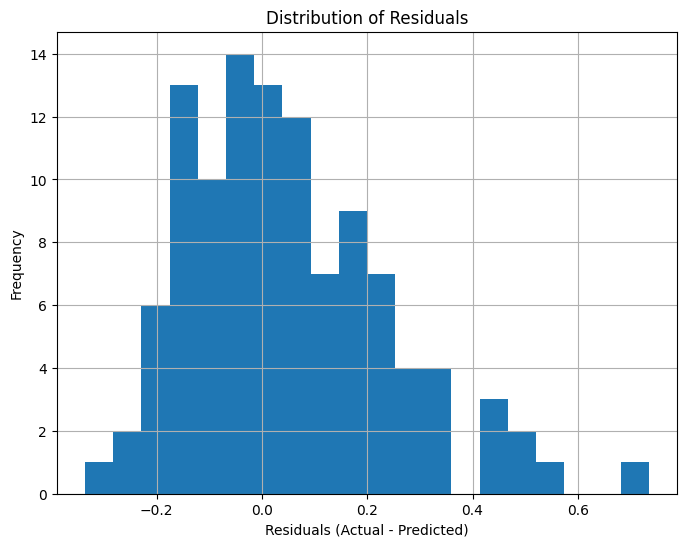

<Figure size 640x480 with 0 Axes>

Mean Absolute Error: 0.1497001051902771


In [45]:
# Define the features (X) and target variable (y)
X = df.drop(columns=['Share'])
y = df['Share']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)

import matplotlib.pyplot as plt

# Get the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Predict on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Calculate the residuals
residuals = y_test - y_pred

# Plot the predicted values against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual Share')
plt.ylabel('Predicted Share')
plt.title('Actual vs. Predicted Share')
plt.grid(True)
plt.show()

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)

MAE for Share bin [0.0-0.2): 0.09448090437963501
MAE for Share bin [0.2-0.4): 0.16272312001203595
MAE for Share bin [0.4-0.6): 0.24355665406567018
MAE for Share bin [0.6-0.8): 0.23388586172830003
MAE for Share bin [0.8-1.0): 0.20356961828815862


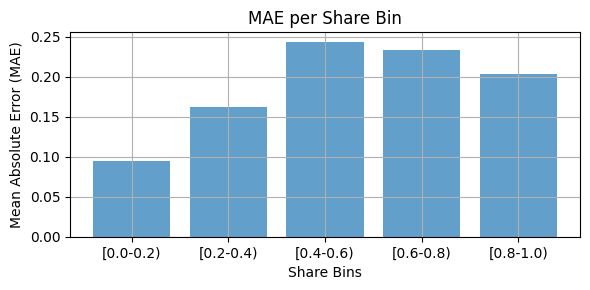

In [46]:
def plot_mae_per_share_bin(y_test, y_pred, bin_edges):
    # Assign predictions and actuals to bins
    bins_predicted = np.digitize(y_pred, bins=bin_edges) - 1  # -1 to match 0-based indexing
    bins_actual = np.digitize(y_test, bins=bin_edges) - 1     # -1 to match 0-based indexing

    # Initialize lists to store MAE for each bin
    mae_per_bin = []

    # Calculate MAE for each bin
    for i in range(len(bin_edges) - 1):
        indices = np.where(bins_actual == i)[0]  # Get indices of actuals in bin i
        if len(indices) > 0:
            mae_bin = np.mean(np.abs(y_test.iloc[indices] - y_pred[indices]))
            mae_per_bin.append(mae_bin)
        else:
            mae_per_bin.append(0.0)  # Handle cases where no actuals are in the bin

    # Print MAE for each bin
    for i, (start, end) in enumerate(zip(bin_edges[:-1], bin_edges[1:])):
        print(f"MAE for Share bin [{start}-{end}): {mae_per_bin[i]}")

    # Plot histogram of MAE values per bin
    plt.figure(figsize=(6, 3))
    plt.bar(range(len(bin_edges) - 1), mae_per_bin, align='center', alpha=0.7)
    plt.xlabel('Share Bins')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('MAE per Share Bin')
    plt.grid(True)
    plt.xticks(range(len(bin_edges) - 1), [f"[{bin_edges[i]}-{bin_edges[i+1]})" for i in range(len(bin_edges) - 1)])
    plt.tight_layout()
    plt.show()

# Example usage (replace with your actual y_test and y_pred)
# Assuming y_test and y_pred are defined from your previous code snippet
bin_edges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plot_mae_per_share_bin(y_test, y_pred, bin_edges)

In [47]:
test_df.head()
test_df.nunique()

wRC       367
Off       475
WAR       383
wRAA      478
RAR       476
Bat       478
WPA/LI    478
RBI       373
L-WAR     371
RE24      487
wFB/C     469
CSW%      431
Share     293
dtype: int64

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0857 - mae: 0.2224 - val_loss: 0.0454 - val_mae: 0.1705
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mae: 0.1519 - val_loss: 0.0403 - val_mae: 0.1525
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0351 - mae: 0.1444 - val_loss: 0.0388 - val_mae: 0.1459
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0332 - mae: 0.1377 - val_loss: 0.0380 - val_mae: 0.1437
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0317 - mae: 0.1343 - val_loss: 0.0366 - val_mae: 0.1404
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0314 - mae: 0.1325 - val_loss: 0.0364 - val_mae: 0.1395
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0301 - mae: 0.1287 - val_loss: 0.0357 - val_mae: 0.1364
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - mae: 0.1271 - val_loss: 0.0352 - val_mae: 0.1341
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.02

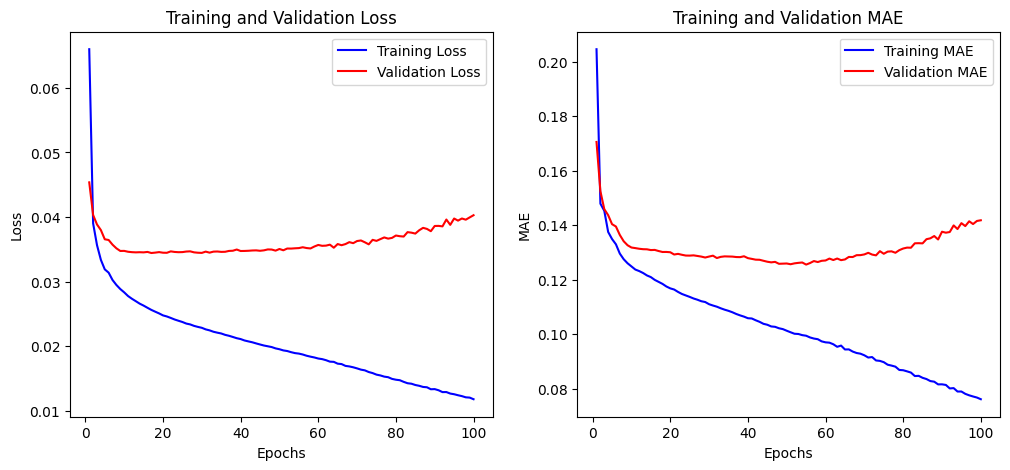

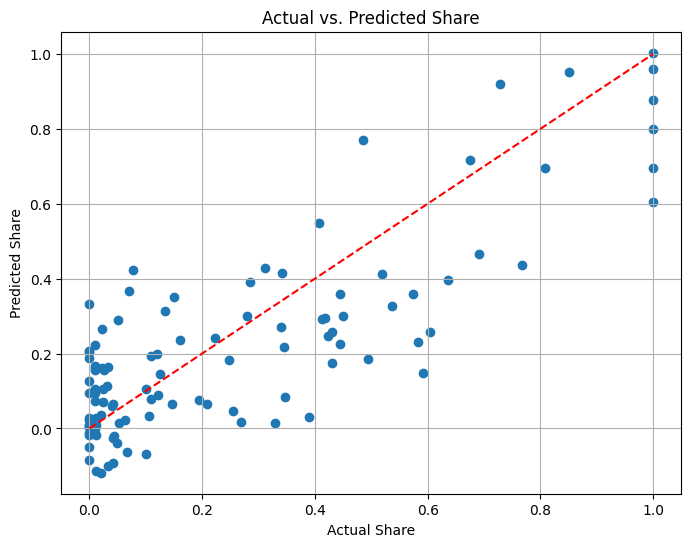

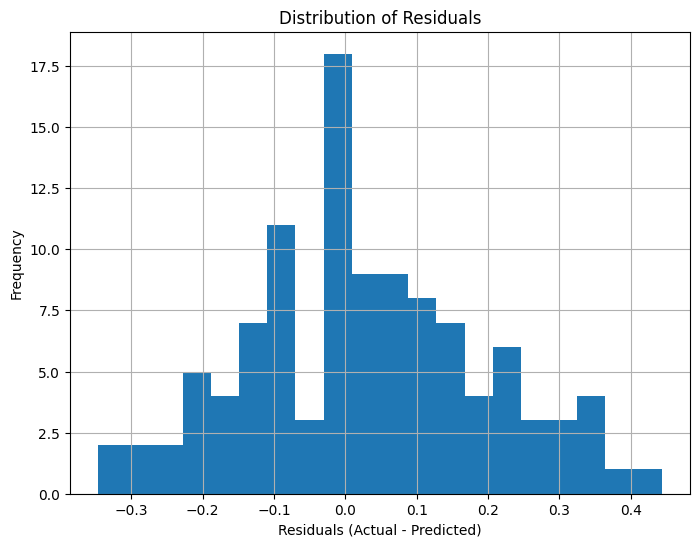

<Figure size 640x480 with 0 Axes>

Mean Absolute Error: 0.13236689567565918


In [48]:
# Define the features (X) and target variable (y)
X = test_df.drop(columns=['Share'])
y = test_df['Share']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)

import matplotlib.pyplot as plt

# Get the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Predict on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Calculate the residuals
residuals = y_test - y_pred

# Plot the predicted values against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual Share')
plt.ylabel('Predicted Share')
plt.title('Actual vs. Predicted Share')
plt.grid(True)
plt.show()

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()

print("Mean Absolute Error:", mae)

MAE for Share bin [0.0-0.2): 0.0965574876960463
MAE for Share bin [0.2-0.4): 0.15253543509344136
MAE for Share bin [0.4-0.6): 0.21007415992388306
MAE for Share bin [0.6-0.8): 0.22908008443543423
MAE for Share bin [0.8-1.0): 0.10739533775431326


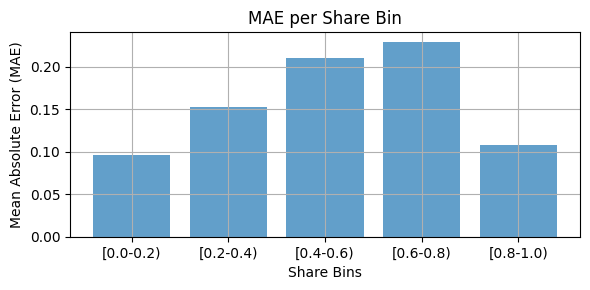

In [49]:
def plot_mae_per_share_bin(y_test, y_pred, bin_edges):
    # Assign predictions and actuals to bins
    bins_predicted = np.digitize(y_pred, bins=bin_edges) - 1  # -1 to match 0-based indexing
    bins_actual = np.digitize(y_test, bins=bin_edges) - 1     # -1 to match 0-based indexing

    # Initialize lists to store MAE for each bin
    mae_per_bin = []

    # Calculate MAE for each bin
    for i in range(len(bin_edges) - 1):
        indices = np.where(bins_actual == i)[0]  # Get indices of actuals in bin i
        if len(indices) > 0:
            mae_bin = np.mean(np.abs(y_test.iloc[indices] - y_pred[indices]))
            mae_per_bin.append(mae_bin)
        else:
            mae_per_bin.append(0.0)  # Handle cases where no actuals are in the bin

    # Print MAE for each bin
    for i, (start, end) in enumerate(zip(bin_edges[:-1], bin_edges[1:])):
        print(f"MAE for Share bin [{start}-{end}): {mae_per_bin[i]}")

    # Plot histogram of MAE values per bin
    plt.figure(figsize=(6, 3))
    plt.bar(range(len(bin_edges) - 1), mae_per_bin, align='center', alpha=0.7)
    plt.xlabel('Share Bins')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('MAE per Share Bin')
    plt.grid(True)
    plt.xticks(range(len(bin_edges) - 1), [f"[{bin_edges[i]}-{bin_edges[i+1]})" for i in range(len(bin_edges) - 1)])
    plt.tight_layout()
    plt.show()

# Example usage (replace with your actual y_test and y_pred)
# Assuming y_test and y_pred are defined from your previous code snippet
bin_edges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plot_mae_per_share_bin(y_test, y_pred, bin_edges)

In [50]:
#test_df_2 = test_df[test_df['Share'] >= 0.75]

In [51]:
nl_df.head()

,Unnamed: 0,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last,IDfg,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,0,ohtani,shohei,0.862046,ohtas001,ohtansh01,0.675553,0.615385,0.0,19755,...,1.000000,1.000000,1.000000,0.488,0.386792,0.476636,1.000000,1.000000,1.000,1.000000
1,1,harper,bryce,0.173458,harpb003,harpebr03,0.291829,0.153846,0.0,11579,...,0.379630,0.333333,0.649616,0.168,0.000000,0.308411,0.390909,0.368821,0.352,0.633333
2,2,ozuna,marcell,0.143763,ozunm001,ozunama01,0.232928,0.230769,0.0,10324,...,0.574074,0.626667,0.846547,0.280,0.245283,0.551402,0.763636,0.980989,0.872,0.733333
3,3,freeman,freddie,0.000000,freef001,freemfr01,0.000000,0.000000,0.0,5361,...,0.361111,0.306667,0.432225,0.456,0.150943,0.000000,0.454545,0.304183,0.408,0.700000
4,4,tatís,fernando,0.893805,tatif002,tatisfe02,0.673394,0.692308,0.0,19709,...,0.777778,0.746667,0.785166,0.488,0.235849,0.373832,0.627273,0.528517,0.496,0.566667


In [52]:
print(attributes)

['wRC', 'Off', 'WAR', 'wRAA', 'RAR', 'Bat', 'WPA/LI', 'RBI', 'L-WAR', 'RE24', 'wFB/C', 'CSW%']


In [53]:
nl_df_test.head()

,wRC,Off,WAR,wRAA,RAR,Bat,WPA/LI,RBI,L-WAR,RE24,wFB/C,CSW%
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.688889,1.000000,0.821209,1.000000,0.476636
1,0.631579,0.543478,0.733333,0.607509,0.731293,0.586885,0.327586,0.622222,0.633333,0.518259,0.607539,0.308411
2,0.868421,0.739130,0.700000,0.921502,0.683673,0.881967,0.798851,1.000000,0.733333,1.000000,0.815965,0.551402
3,0.789474,0.618012,0.700000,0.699659,0.687075,0.714754,0.517241,0.555556,0.700000,0.435291,0.416851,0.000000
4,0.552632,0.397516,0.566667,0.392491,0.554422,0.452459,0.298851,0.377778,0.566667,0.330120,0.545455,0.373832


In [54]:
# Assume X_new is your new data that you want to predict on

# Transform the new data using the fitted scaler
X_new_scaled = scaler.transform(nl_df_test)

# Predict on the new data
y_pred_new = model.predict(X_new_scaled).flatten()

# Display the predictions
print("Predictions for new data:")
print(y_pred_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions for new data:
[ 1.003643    0.43141076  0.54234827  0.46566382  0.29039928  0.5229312
  0.15892278 -0.03916722  0.5383385   0.36186185  0.15710473  0.12244049
 -0.01566895 -0.09491054 -0.0317593   0.02340553  0.23660345  0.0866574 ]


In [55]:
predictions_NL['Predicted Share (TF)'] = y_pred_new
print(predictions_NL)

     Last Name First Name  Predicted Share (Random Forest)    Date_Run  \
0       ohtani     shohei                         0.947215  2024-06-19   
1       harper      bryce                         0.300851  2024-06-19   
2        ozuna    marcell                         0.509015  2024-06-19   
3      freeman    freddie                         0.425894  2024-06-19   
4        tatís   fernando                         0.164743  2024-06-19   
5        marte      ketel                         0.371068  2024-06-19   
6    contreras    william                         0.246524  2024-06-19   
7        olson       matt                         0.036017  2024-06-19   
8        betts     mookie                         0.535315  2024-06-19   
9         bohm       alec                         0.222141  2024-06-19   
10      lindor  francisco                         0.228390  2024-06-19   
11  de la cruz       elly                         0.148722  2024-06-19   
12      abrams         cj             

In [56]:
al_df_test.head()

,wRC,Off,WAR,wRAA,RAR,Bat,WPA/LI,RBI,L-WAR,RE24,wFB/C,CSW%
0,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,0.636519,0.663717
1,0.857143,0.819413,0.94,0.840183,0.934021,0.845475,0.857143,0.756757,0.94,0.966964,1.000000,0.610619
2,0.673469,0.720090,0.94,0.643836,0.944330,0.657837,0.440644,0.594595,0.92,0.638774,0.332765,0.548673
3,0.612245,0.580135,0.90,0.554795,0.898969,0.518764,0.643863,0.648649,0.86,0.780048,0.498294,0.442478
4,0.387755,0.442438,0.48,0.388128,0.484536,0.408389,0.492958,0.972973,0.46,0.823082,0.464164,0.070796


In [57]:
# Assume X_new is your new data that you want to predict on

# Transform the new data using the fitted scaler
X_new_scaled = scaler.transform(al_df_test)

# Predict on the new data
y_pred_new = model.predict(X_new_scaled).flatten()

# Display the predictions
print("Predictions for new data:")
print(y_pred_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predictions for new data:
[ 0.9123821   0.80118763  0.5158787   0.5125843   0.2924808   0.27105328
 -0.10030902  0.23258398 -0.00290747 -0.01196024  0.098167    0.10835617
 -0.04122442 -0.03437608 -0.01318703 -0.00398504  0.11644133 -0.02724796]


In [58]:
predictions_AL['Predicted Share (TF)'] = y_pred_new
print(predictions_AL)

    Last Name First Name  Predicted Share (Random Forest)    Date_Run  \
0       judge      aaron                         0.991818  2024-06-19   
1        soto       juan                         0.607432  2024-06-19   
2   henderson     gunnar                         0.265700  2024-06-19   
3        witt      bobby                         0.323770  2024-06-19   
4     ramírez       josé                         0.199791  2024-06-19   
5      tucker       kyle                         0.260213  2024-06-19   
6      seager      corey                         0.054387  2024-06-19   
7   rutschman      adley                         0.115393  2024-06-19   
8     álvarez     yordan                         0.077049  2024-06-19   
9      devers     rafael                         0.053283  2024-06-19   
10     altuve       josé                         0.094211  2024-06-19   
11     semien     marcus                         0.065180  2024-06-19   
12      pérez   salvador                         0.

In [59]:
predictions_MVP = pd.concat([predictions_NL, predictions_AL], ignore_index=True)
predictions_MVP = predictions_MVP.round(2)
predictions_MVP.head()

,Last Name,First Name,Predicted Share (Random Forest),Date_Run,wRC,Off,WAR,wRAA,RAR,Bat,WPA/LI,RBI,L-WAR,RE24,wFB/C,CSW%,Predicted Share (TF)
0,ohtani,shohei,0.95,2024-06-19,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.69,1.00,0.82,1.00,0.48,1.00
1,harper,bryce,0.30,2024-06-19,0.63,0.54,0.73,0.61,0.73,0.59,0.33,0.62,0.63,0.52,0.61,0.31,0.43
2,ozuna,marcell,0.51,2024-06-19,0.87,0.74,0.70,0.92,0.68,0.88,0.80,1.00,0.73,1.00,0.82,0.55,0.54
3,freeman,freddie,0.43,2024-06-19,0.79,0.62,0.70,0.70,0.69,0.71,0.52,0.56,0.70,0.44,0.42,0.00,0.47
4,tatís,fernando,0.16,2024-06-19,0.55,0.40,0.57,0.39,0.55,0.45,0.30,0.38,0.57,0.33,0.55,0.37,0.29


In [60]:
predictions_MVP['Predicted Share (TF) Clipped'] = np.where(predictions_MVP['Predicted Share (TF)'] < 0, 0, predictions_MVP['Predicted Share (TF)'])
predictions_MVP['Predicted Share (TF) Clipped'] = np.where(predictions_MVP['Predicted Share (TF)'] > 1.0, 1.0, predictions_MVP['Predicted Share (TF)'])
predictions_MVP["Average Share"] = ((predictions_MVP["Predicted Share (Random Forest)"] + predictions_MVP["Predicted Share (TF) Clipped"])/2).round(2)

In [61]:
predictions_MVP.to_csv("predictions_MVP.csv")